In [21]:
import os
import pandas as pd
import json
import re
import matplotlib.pyplot as plt

Visualizando os dados em JSON

In [22]:
caminho = r"C:\Users\victo\OneDrive\Documentos\Faculdade Senac\4 Periodo\Big Data\API\estoque_transacoes_cartoes\data\estoque_transações_cartões.json"
df = pd.read_json(caminho)
print(df.head())

                                      @odata.context  \
0  https://was-p.bcnet.bcb.gov.br/olinda/servico/...   
1  https://was-p.bcnet.bcb.gov.br/olinda/servico/...   
2  https://was-p.bcnet.bcb.gov.br/olinda/servico/...   
3  https://was-p.bcnet.bcb.gov.br/olinda/servico/...   
4  https://was-p.bcnet.bcb.gov.br/olinda/servico/...   

                                               value  
0  {'trimestre': '20231', 'qtdCartoesEmitidos': 7...  
1  {'trimestre': '20173', 'qtdCartoesEmitidos': 9...  
2  {'trimestre': '20192', 'qtdCartoesEmitidos': 1...  
3  {'trimestre': '20171', 'qtdCartoesEmitidos': 1...  
4  {'trimestre': '20242', 'qtdCartoesEmitidos': 2...  


Transformar o arquivo JSON em Dataframe

In [23]:
# Caminho para o JSON bruto
caminho_json = r"C:\Users\victo\OneDrive\Documentos\Faculdade Senac\4 Periodo\Big Data\API\estoque_transacoes_cartoes\data\estoque_transações_cartões.json"

# Ler o JSON e carregar os dados da chave 'value'
with open(caminho_json, "r", encoding="utf-8") as f:
    dados = json.load(f)

# Transformar o JSON em DataFrame
df = pd.DataFrame(dados["value"])

# Exibir as 5 primeiras linhas para conferência
df.head()

,trimestre,qtdCartoesEmitidos,qtdCartoesAtivos,qtdTransacoesNacionais,valorTransacoesNacionais,qtdTransacoesInternacionais,valorTransacoesInternacionais
0,20231,739765,404801,12940268,1.269265e+09,693,1.251658e+05
1,20173,983369,771386,49748354,9.648105e+09,3281840,1.270568e+09
2,20192,13454781,5296965,80999154,7.045629e+09,32135,2.346462e+06
3,20171,1017551,525736,11035199,1.367914e+09,131,3.760846e+04
4,20242,28306,11255,133229,1.094766e+08,857,8.285176e+05


Extrair os dados do JSON e tratar para CSV

In [24]:
# === Caminhos ===
caminho_json = r"C:\Users\victo\OneDrive\Documentos\Faculdade Senac\4 Periodo\Big Data\API\estoque_transacoes_cartoes\data\estoque_transações_cartões.json"
pasta_tratados = os.path.join(os.path.dirname(caminho_json), "..", "tratados")
os.makedirs(pasta_tratados, exist_ok=True)
caminho_csv = os.path.join(pasta_tratados, "estoque_transações_cartões.csv")

# === Ler JSON e acessar a chave 'value' ===
with open(caminho_json, "r", encoding="utf-8") as f:
    dados = json.load(f)

df = pd.DataFrame(dados["value"])  # pega somente os dados

# === Converter coluna AnoMes para datetime e ordenar ===
df["trimestre"] = pd.to_datetime(df["trimestre"].astype(str), format="%Y%m", errors="coerce")
df["trimestre"] = df["trimestre"].dt.strftime("%Y-%m")
df = df.sort_values("trimestre")

# === Renomear a coluna para AnoMes ===
df.rename(columns={"trimestre": "AnoMes"}, inplace=True)

# === Garantir que colunas numéricas sejam números ===
def to_num(x):
    if pd.isna(x): 
        return x
    s = str(x).strip()
    s = s.replace(".", "").replace(",", ".")          # remove separador de milhar, troca decimal vírgula por ponto
    s = re.sub(r"[^0-9\.\-]", "", s)                  # remove símbolos extras
    try:
        return float(s)
    except:
        return pd.NA

for col in df.columns:
    low = col.lower()
    if low.startswith("quantidade") or low.startswith("valor"):
        df[col] = df[col].map(to_num)

# === Salvar CSV tratado ===
df.to_csv(caminho_csv, index=False, encoding="utf-8")
print("✅ CSV tratado salvo com sucesso!")
print("📂 Local:", caminho_csv)
df.head()

✅ CSV tratado salvo com sucesso!
📂 Local: C:\Users\victo\OneDrive\Documentos\Faculdade Senac\4 Periodo\Big Data\API\estoque_transacoes_cartoes\data\..\tratados\estoque_transações_cartões.csv


,AnoMes,qtdCartoesEmitidos,qtdCartoesAtivos,qtdTransacoesNacionais,valorTransacoesNacionais,qtdTransacoesInternacionais,valorTransacoesInternacionais
3664,2011-01,47738,22316,561436,1.896166e+10,23079,1.309476e+09
483,2011-01,12548,7593,2005247,8.829330e+05,160469,4.391700e+04
1472,2011-01,2644932,1018999,21647273,1.216156e+10,0,0.000000e+00
5442,2011-01,933929,303502,6113886,3.873185e+09,4049,8.087694e+07
3215,2011-01,747,365,6613,1.614554e+08,447,3.937345e+06


Verificando valores nulos e exibindo os tipos de dados em df:

In [25]:
print("Contagem de Valores NULOS:")
print(df.isnull().sum())

print("\nTipos de Dados:")
print(df.dtypes)

Contagem de Valores NULOS:
AnoMes                           0
qtdCartoesEmitidos               0
qtdCartoesAtivos                 0
qtdTransacoesNacionais           0
valorTransacoesNacionais         0
qtdTransacoesInternacionais      0
valorTransacoesInternacionais    0
dtype: int64

Tipos de Dados:
AnoMes                            object
qtdCartoesEmitidos                 int64
qtdCartoesAtivos                   int64
qtdTransacoesNacionais             int64
valorTransacoesNacionais         float64
qtdTransacoesInternacionais        int64
valorTransacoesInternacionais    float64
dtype: object


Valor total pelo tipo de transações de cartões

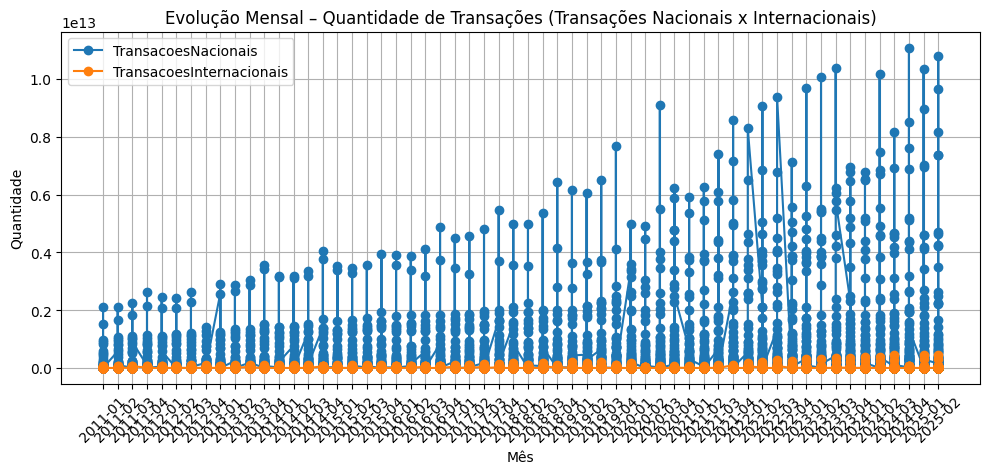

In [28]:
plt.figure(figsize=(10,5))
plt.plot(df["AnoMes"], df["valorTransacoesNacionais"], marker="o", label="TransacoesNacionais")
plt.plot(df["AnoMes"], df["valorTransacoesInternacionais"], marker="o", label="TransacoesInternacionais")
plt.title("Evolução Mensal – Quantidade de Transações (Transações Nacionais x Internacionais)")
plt.xlabel("Mês")
plt.ylabel("Quantidade")
plt.grid()
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Evolução mensal da quantidade de transações

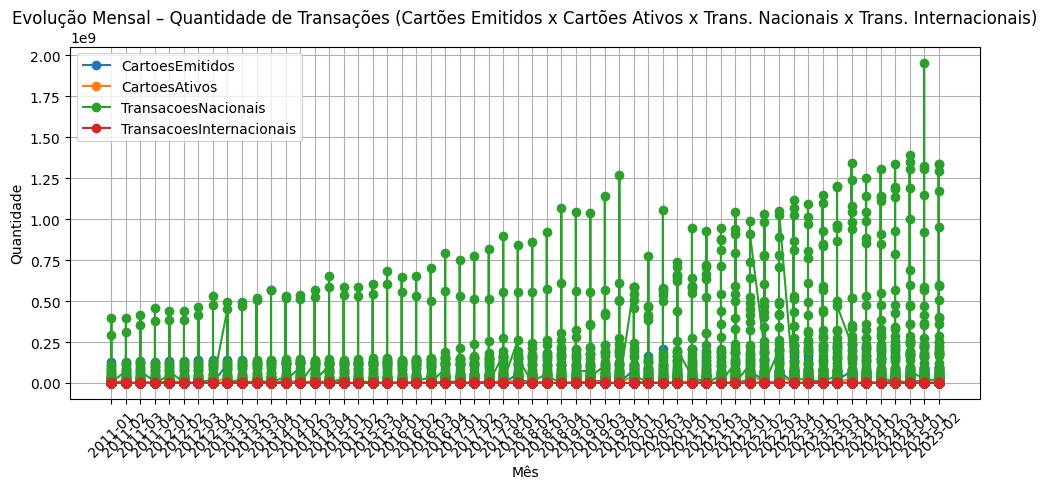

In [ ]:

plt.figure(figsize=(10,5))
plt.plot(df["AnoMes"], df["qtdCartoesEmitidos"], marker="o", label="CartoesEmitidos")
plt.plot(df["AnoMes"], df["qtdCartoesAtivos"], marker="o", label="CartoesAtivos")
plt.plot(df["AnoMes"], df["qtdTransacoesNacionais"], marker="o", label="TransacoesNacionais")
plt.plot(df["AnoMes"], df["qtdTransacoesInternacionais"], marker="o", label="TransacoesInternacionais")
plt.title("Evolução Mensal – Quantidade de Transações (Cartões Emitidos x Cartões Ativos x Trans. Nacionais x Trans. Internacionais)")
plt.xlabel("Mês")
plt.ylabel("Quantidade")
plt.grid()
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Comparativo total entre quantidade de transações

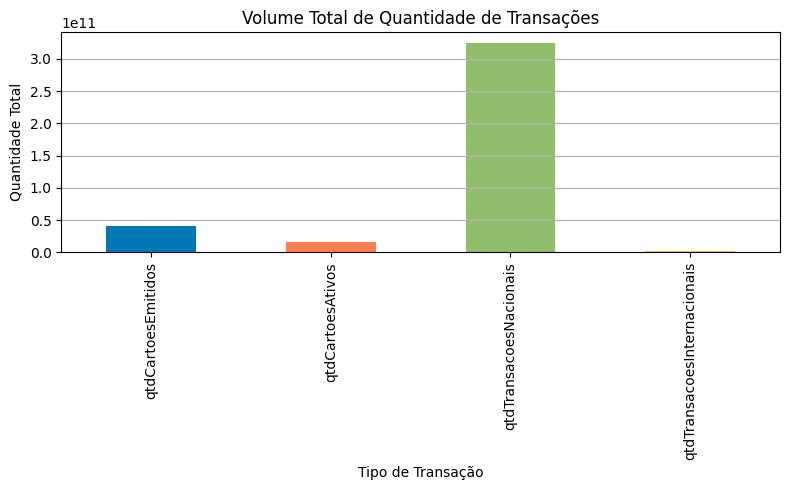

In [27]:
cols_qtd = ["qtdCartoesEmitidos", "qtdCartoesAtivos", "qtdTransacoesNacionais", "qtdTransacoesInternacionais"]
totais = df[cols_qtd].sum(numeric_only=True)

plt.figure(figsize=(8,5))
totais.plot(kind="bar", color=["#0077b6", "#ff7f51", "#90be6d", "#f9c74f"])
plt.title("Volume Total de Quantidade de Transações")
plt.ylabel("Quantidade Total")
plt.xlabel("Tipo de Transação")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

Percentual total por tipo de transação

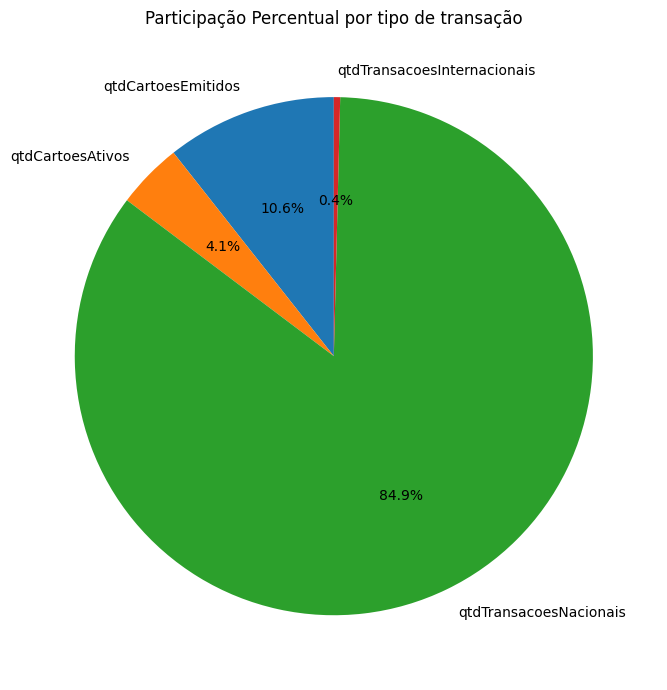

In [29]:
plt.figure(figsize=(7,7))
totais.plot(kind="pie", autopct="%1.1f%%", startangle=90, ylabel="")
plt.title("Participação Percentual por tipo de transação")
plt.tight_layout()
plt.show()